## Exploratory Data Analysis (EDA)

This section explores customer churn patterns using descriptive statistics and visual analysis. The goal is to identify key demographic, service-related, and revenue-driven factors associated with churn, and to translate these findings into actionable business insights.


## 1: Importing Packages

In [1]:
import pandas as pd # for data manipulation and analysis
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

## 2: Loading Data

In [13]:
df = pd.read_csv('../data/processed/telco_churn_cleaned.csv')
df.head()

,customer_id,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,country,state,city,zip_code,latitude,longitude,population,quarter,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,customer_status,churn_label,churn_score,cltv,churn_category,churn_reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,90065,34.108833,-118.229715,47534,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,90303,33.936291,-118.332639,27778,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,Whittier,90602,33.972119,-118.020188,26265,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,1,67,2793,Price,Extra data charges


## 3: Overall Churn Overview

Here we are checking for :
1. Overall churn rate
2. Stayed vs churned customers

In [15]:
df['churn_label'].value_counts(normalize=True)

churn_label
0    0.73463
1    0.26537
Name: proportion, dtype: float64

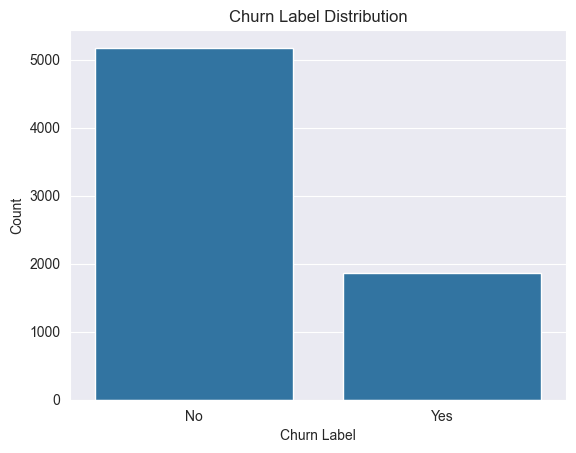

In [16]:
sns.countplot(x='churn_label', data=df)
plt.xticks([0,1],['No','Yes'])
plt.xlabel('Churn Label')
plt.ylabel('Count')
plt.title('Churn Label Distribution')
plt.show()

The dataset shows a moderate churn rate, indicating that customer attrition is a meaningful business concern rather than a rare event.


## 4: Churn Distribution by Customer Tenure

Here we are considering that:
1. Early churn is expensive
2. Lifetime value depends on tenure

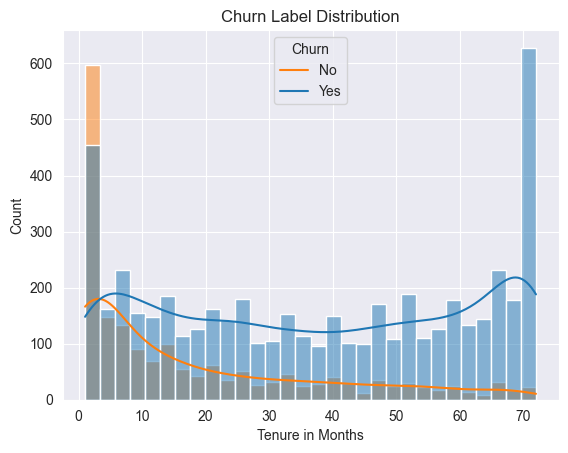

In [23]:
sns.histplot(
     x="tenure_in_months",
    data=df,
    hue='churn_label',
    bins=30,
    kde = True
)
plt.xlabel('Tenure in Months')
plt.legend(title="Churn", labels=["No", "Yes"])
plt.ylabel('Count')
plt.title('Churn Label Distribution')
plt.show()


The churn distribution by tenure shows that customers with shorter tenure are more likely to churn, while customers with longer tenure tend to remain with the company. This suggests that the early stages of the customer lifecycle are critical for retention, and proactive onboarding and engagement strategies could help reduce churn.


## 5. Churn vs Contract Type

In [12]:
df.groupby('contract')['churn_label'].mean()

# df.groupby('contract')['churn_label'].value_counts(normalize=True)

TypeError: agg function failed [how->mean,dtype->object]